# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Import Data

# 1

In [720]:
df = pd.read_csv('../Data/action_log_features.csv')

In [222]:
df.describe()

account  account_access    add_account     add_action  \
count  182887.000000   182887.000000  182887.000000  182887.000000   
mean      372.056532        0.000623       0.001837       0.003784   
std       252.038752        0.141038       0.246686       0.264051   
min         2.000000        0.000000       0.000000       0.000000   
25%       152.000000        0.000000       0.000000       0.000000   
50%       337.000000        0.000000       0.000000       0.000000   
75%       566.000000        0.000000       0.000000       0.000000   
max       939.000000       59.000000     101.000000      49.000000   

         add_contact      add_draft      add_group  add_html_template  \
count  182887.000000  182887.000000  182887.000000      182887.000000   
mean        0.004391       0.009952       0.000087           0.000060   
std         0.263430       0.245292       0.010967           0.013019   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.000000       0.000000       0.000000           0.000000   
50%         0.000000       0.000000       0.000000           0.000000   
75%         0.000000       0.000000       0.000000           0.000000   
max        82.000000      89.000000       3.000000           5.000000   

            add_role    add_snippet     add_status   add_workflow  \
count  182887.000000  182887.000000  182887.000000  182887.000000   
mean        0.001531       0.000033       0.001148       0.000060   
std         0.230320       0.005728       0.094516       0.009641   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        94.000000       1.000000      22.000000       2.000000   

       adm_open_settings    apply_label  attach_task_file  attach_template  \
count      182887.000000  182887.000000     182887.000000    182887.000000   
mean            0.003800       0.096530          2.600764         0.000257   
std             0.208341       1.088612          7.990105         0.059017   
min             0.000000       0.000000          0.000000         0.000000   
25%             0.000000       0.000000          0.000000         0.000000   
50%             0.000000       0.000000          0.000000         0.000000   
75%             0.000000       0.000000          2.000000         0.000000   
max            37.000000      86.000000        710.000000        18.000000   

       auth_confirm_caution  change_contact_status  change_password  \
count         182887.000000          182887.000000    182887.000000   
mean               0.677402               0.000197         0.000312   
std                1.564275               0.017498         0.017651   
min                0.000000               0.000000         0.000000   
25%                0.000000               0.000000         0.000000   
50%                0.000000               0.000000         0.000000   
75%                1.000000               0.000000         0.000000   
max               73.000000               3.000000         1.000000   

       change_service_user_status  clear_account_settings  clone_workflow  \
count               182887.000000           182887.000000   182887.000000   
mean                     0.000011                0.000492        0.000142   
std                      0.004677                0.040363        0.026661   
min                      0.000000                0.000000        0.000000   
25%                      0.000000                0.000000        0.000000   
50%                      0.000000                0.000000        0.000000   
75%                      0.000000                0.000000        0.000000   
max                      2.000000               12.000000        9.000000   

         create_task  deactivate_workflow  download_task_file  \


In [221]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

[22.0, 10.0, 20.0, 9.0]


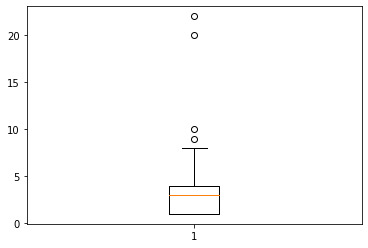

In [226]:
col = 'add_status'
test = df[df[col] != 0][['account', 'at', col]]
# print(set(test['account']))
f = plt.boxplot(test[col])
print(list(f["fliers"][0].get_data()[1]))
# px.box(test, y=col, hover_data=df[['account', 'at']])

In [330]:
df[df.columns[2:]].sum().sort_values()

remove_snippet                      1.0
two_factor_email                    2.0
open_new_docx_template              2.0
make_available                      2.0
import_contacts                     2.0
export_template                     2.0
deactivate_workflow                 2.0
change_service_user_status          2.0
set_status_state                    3.0
open_incident_log                   3.0
unsuspend_role                      6.0
add_snippet                         6.0
edit_workflow_group                 6.0
make_unavailable                    7.0
open_new_snippet                    8.0
remove_role                         8.0
add_workflow                       11.0
add_html_template                  11.0
export_contacts                    12.0
open_new_html_template             13.0
remove_account                     13.0
open_workflow_group                16.0
add_group                          16.0
download_template                  17.0
import_workflow                    18.0


In [20]:
pivot = df[['login', 'logout']]
pivot.insert(0, 'who_when', list(map(lambda i: i[0] + ' ' + str(i[1]), zip(df['at'].tolist(), df['account'].tolist()))))
pivot

who_when  login  logout
0         2019-03-27 2.0    3.0     1.0
1         2019-03-28 2.0    9.0     7.0
2         2019-04-05 2.0    2.0     0.0
3         2019-04-08 2.0    3.0     0.0
4         2019-04-09 2.0    2.0     1.0
...                  ...    ...     ...
183547  2021-06-24 939.0    2.0     0.0
183548  2021-06-25 939.0    1.0     0.0
183549  2021-06-28 939.0    2.0     0.0
183550  2021-06-29 939.0    1.0     0.0
183551  2021-06-30 939.0    0.0     0.0

[183552 rows x 3 columns]

In [21]:
pivot = pivot.loc[(pivot[['login', 'logout']].sum(axis=1) != 0)]
pivot

who_when  login  logout
0         2019-03-27 2.0    3.0     1.0
1         2019-03-28 2.0    9.0     7.0
2         2019-04-05 2.0    2.0     0.0
3         2019-04-08 2.0    3.0     0.0
4         2019-04-09 2.0    2.0     1.0
...                  ...    ...     ...
183545  2021-06-22 939.0    1.0     0.0
183547  2021-06-24 939.0    2.0     0.0
183548  2021-06-25 939.0    1.0     0.0
183549  2021-06-28 939.0    2.0     0.0
183550  2021-06-29 939.0    1.0     0.0

[175024 rows x 3 columns]

In [25]:
piva = pivot.loc[(pivot['logout'] > pivot['login'])]

In [27]:
px.scatter(pivot, x='login', y='logout',
           color_continuous_scale=px.colors.diverging.Portland)

In [645]:
df = df[df.columns[1:]]
df.head()

account          at  account_access  add_account  add_action  add_contact  \
0      2.0  2021-03-03             1.0          0.0         0.0          0.0   
1      2.0  2021-03-05             0.0          0.0         0.0          1.0   
2      2.0  2021-03-15             0.0          0.0         3.0          0.0   
3      2.0  2021-03-16             0.0          0.0         2.0          0.0   
4      2.0  2021-03-17             0.0          0.0         3.0          1.0   

   add_draft  add_role  add_snippet  add_status  ...  remove_inform  \
0        0.0       0.0          0.0         0.0  ...            0.0   
1        0.0       0.0          0.0         0.0  ...            0.0   
2        0.0       0.0          0.0         2.0  ...            0.0   
3        0.0       0.0          0.0         1.0  ...            0.0   
4        0.0       0.0          1.0         2.0  ...            0.0   

   remove_role  reset_req  set_action_state  set_new_pass  suspend_account  \
0          0.0        0.0               0.0           0.0              0.0   
1          0.0        0.0               1.0           0.0              0.0   
2          0.0        0.0               0.0           0.0              0.0   
3          0.0        0.0               0.0           0.0              0.0   
4          0.0        0.0               0.0           0.0              0.0   

   suspend_role  token_login  unblock_password_reset  unsuspend_account  
0           0.0          1.0                     0.0                0.0  
1           0.0          0.0                     0.0                0.0  
2           0.0          2.0                     0.0                0.0  
3           0.0          0.0                     0.0                0.0  
4           0.0          2.0                     0.0                0.0  

[5 rows x 67 columns]

# 2

In [721]:
df = df[(df['at'] >= '2021-03-01') & (df['at'] < '2021-06-01')]

# 3

In [722]:
names = list(map(lambda i: i[0] + ' ' + str(i[1]), zip(df['at'].tolist(), df['account'].tolist())))

# 4

In [723]:
# df = df[['remove_account',
#         'remove_action',
#         'remove_contact',
#         'remove_draft',
#         'remove_inform',
#         'remove_role',
#         'remove_snippet',
#         'remove_status',
#         'remove_workflow',
#         'change_contact_status',
#         'change_password',
#         'change_service_user_status',
#         'download_task_file',
#         'download_task_files',
#         'download_template',
#         'deactivate_workflow',
#         'clear_account_settings',
#         'auth_confirm_caution',
#         'suspend_account',
#         'suspend_role',
#         'add_snippet',
#         'reset_password',
#         'export_contacts',
#         'export_template',
#         'export_workflow',
#         'two_factor_email',
#         'set_new_pass',]]
df = df[['remove_inform',
         'download_task_file',
         'download_task_files',
         'auth_confirm_caution',
         'suspend_role']]

In [409]:
df.describe()

remove_account  remove_action  remove_inform  download_task_file  \
count    19184.000000   19184.000000   19184.000000        19184.000000   
mean         0.000104       0.000052       1.287375           17.290190   
std          0.010210       0.007220       5.331813           45.773351   
min          0.000000       0.000000       0.000000            0.000000   
25%          0.000000       0.000000       0.000000            0.000000   
50%          0.000000       0.000000       0.000000            4.000000   
75%          0.000000       0.000000       1.000000           17.000000   
max          1.000000       1.000000     229.000000         3437.000000   

       download_task_files  auth_confirm_caution  suspend_role  set_new_pass  
count         19184.000000          19184.000000  19184.000000  19184.000000  
mean              0.227429              1.974093      0.008705      0.006464  
std               1.375585              1.700510      0.821870      0.080787  
min               0.000000              0.000000      0.000000      0.000000  
25%               0.000000              1.000000      0.000000      0.000000  
50%               0.000000              1.000000      0.000000      0.000000  
75%               0.000000              2.000000      0.000000      0.000000  
max              61.000000             26.000000    104.000000      2.000000

In [404]:
df = df.loc[(df.sum(axis=1) != 0)]

In [ ]:
x	y	cluster	name
"""308	0.198279	0.174260	-1	2021-05-05 15.0
455 	0.048299	0.307924	-1	2021-04-22 18.0
619 	0.731604	-0.013538	-1	2021-04-27 21.0
669 	0.045401	0.311659	-1	2021-03-29 22.0
1180	0.006898	0.289007	-1	2021-03-23 37.0
1195	0.014684	0.659590	-1	2021-04-09 37.0
1224	-0.029340	0.396269	-1	2021-05-18 37.0
1501	0.654813	-0.001798	-1	2021-04-27 46.0
3442	0.086527	0.305599	-1	2021-04-27 107.0
3689	0.011953	0.363039	-1	2021-04-27 112.0
5509	0.846035	-0.033965	-1	2021-04-20 175.0
6014	-0.025075	0.447283	-1	2021-05-03 195.0
6632	-0.022817	0.529246	-1	2021-04-15 214.0
8762	0.234505	0.128749	-1	2021-05-21 305.0
9751	0.654054	-0.027154	-1	2021-03-01 354.0
9760	0.654013	-0.027392	-1	2021-03-16 354.0
9785	0.653919	-0.027926	-1	2021-04-20 354.0
10051	0.425258	0.054385	-1	2021-05-05 365.0
10347	0.923135	-0.034931	-1	2021-04-06 376.0
10688	0.012593	0.314542	-1	2021-04-20 402.0
10690	0.199881	0.150700	-1	2021-04-22 402.0
10698	0.117657	0.377063	-1	2021-04-30 402.0
10776	0.238891	0.107008	-1	2021-03-01 407.0
10778	0.238387	0.143161	-1	2021-03-03 407.0
10780	0.123561	0.140310	-1	2021-03-05 407.0
10793	0.200536	0.159652	-1	2021-03-22 407.0
10794	0.164249	0.203095	-1	2021-03-23 407.0
10795	0.162216	0.154341	-1	2021-03-24 407.0
12134	0.061727	0.802029	-1	2021-03-17 482.0
14406	-0.053183	0.813709	-1	2021-04-30 617.0
15409	0.122315	0.180613	-1	2021-04-06 756.0
15411	0.237483	0.138172	-1	2021-04-08 756.0
15412	0.122983	0.162307	-1	2021-04-09 756.0
15415	0.198833	0.124485	-1	2021-04-13 756.0
15418	0.165532	0.322320	-1	2021-04-16 756.0
15420	0.128324	0.343759	-1	2021-04-20 756.0
15421	0.125734	0.307146	-1	2021-04-21 756.0
15423	0.199305	0.189132	-1	2021-04-23 756.0
15424	0.238012	0.161418	-1	2021-04-26 756.0
15512	0.045852	0.313751	-1	2021-05-31 757.0
16710	0.351723	0.146510	-1	2021-04-22 841.0
16711	0.275933	0.154960	-1	2021-04-23 841.0
17115	-0.026078	0.402518	-1	2021-03-02 850.0
17713	0.046952	0.255184	-1	2021-05-19 864.0
17740	0.009999	0.309832	-1	2021-03-29 866.0
17760	0.121967	0.197262	-1	2021-04-26 866.0
19135	0.123489	0.244997	-1	2021-04-29 936.0"""

In [491]:
# df

In [707]:
px.line(df[df['account'] == 15], x='at', y=df.columns.tolist()[2:])

In [376]:
# df[df.columns[2:]].sum()[df[df.columns[2:]].sum() == 3]

# Standardizing data

# 5

In [724]:
x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

# Use PCA to reduce 60 columns into 2

# 6

In [725]:
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

# Apply DBSCAN

# 7

In [726]:
# train the model using DBSCAN
db = DBSCAN(eps=0.015, min_samples=10)

# prediction for dbscan clusters
db_clusters = db.fit_predict(reduced)

In [727]:
reduced

0         1
0     -0.037745 -0.006460
1     -0.037745 -0.006460
2      0.000701 -0.007537
3     -0.037745 -0.006460
4      0.039105 -0.008852
...         ...       ...
19186  0.000680 -0.007656
19187 -0.037745 -0.006460
19188  0.000680 -0.007656
19189 -0.037745 -0.006460
19190  0.000701 -0.007537

[19191 rows x 2 columns]

# 8

In [728]:
reduced['cluster'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

x         y  cluster            name
0 -0.037745 -0.006460        0  2021-03-01 2.0
1 -0.037745 -0.006460        0  2021-03-02 2.0
2  0.000701 -0.007537        1  2021-03-03 2.0
3 -0.037745 -0.006460        0  2021-03-04 2.0
4  0.039105 -0.008852        2  2021-03-05 2.0

In [729]:
list(set(db_clusters))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1]

In [730]:
reduced[(reduced['cluster'] == -1)]

x         y  cluster              name
288    0.044377  0.168402       -1   2021-04-07 15.0
308    0.198279  0.174260       -1   2021-05-05 15.0
310    0.006038  0.192701       -1   2021-05-07 15.0
313    0.158250  0.120770       -1   2021-05-10 15.0
314    0.119733  0.114331       -1   2021-05-11 15.0
...         ...       ...      ...               ...
18831  0.044639  0.155060       -1  2021-05-25 913.0
18834  0.043332  0.177484       -1  2021-05-31 913.0
18887  0.046009  0.248246       -1  2021-05-31 914.0
19135  0.123489  0.244997       -1  2021-04-29 936.0
19175 -0.075034  0.034258       -1  2021-05-07 939.0

[168 rows x 4 columns]

# Plotting DBSCAN

# 9

In [731]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

px.scatter(reduced, x='x', y='y', color="cluster",
           color_continuous_scale=px.colors.diverging.Portland)
# sns.set(style="white")

# ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
#                    fit_reg=False, height = 10, scatter_kws={"s": 250})

# texts = []
# for x, y, s in zip(reduced.x, reduced.y, reduced.name):
#     texts.append(plt.text(x, y, s))

# ax.set(ylim=(-20, 20))
# plt.tick_params(labelsize=15)
# plt.xlabel("PC 1", fontsize = 20)
# plt.ylabel("PC 2", fontsize = 20)

# plt.show()

In [637]:
reduced[(reduced['x'] < -0.05) & (reduced['y'] < 0.1)]

x         y  cluster              name
148   -0.076160 -0.005205        0   2021-05-02 10.0
208   -0.076061 -0.001634        0   2021-05-07 11.0
773   -0.076150 -0.005146        0   2021-03-17 25.0
1189  -0.076171 -0.005264        0   2021-04-03 37.0
1243  -0.075010  0.051795        0   2021-03-17 38.0
1334  -0.075773  0.009021        0   2021-04-29 41.0
1416  -0.075926 -0.000862        0   2021-03-17 45.0
1417  -0.075984 -0.004195        0   2021-03-18 45.0
1582  -0.076087 -0.004789        0   2021-04-14 50.0
1645  -0.076171 -0.005264        0   2021-03-08 53.0
1737  -0.076171 -0.005264        0   2021-04-27 55.0
1797  -0.076139 -0.005086        0   2021-04-28 58.0
1854  -0.076129 -0.005027        0   2021-03-08 62.0
1857  -0.076171 -0.005264        0   2021-03-11 62.0
1884  -0.074714  0.074195        0   2021-04-12 62.0
2013  -0.075847  0.002591        0   2021-03-30 65.0
2061  -0.076171 -0.005264        0   2021-04-20 67.0
2123  -0.076150 -0.005146        0   2021-04-23 71.0
2738  -0.076171 -0.005264        0   2021-03-17 89.0
2860  -0.076171 -0.005264        0   2021-04-07 92.0
2969  -0.076119 -0.004967        0   2021-04-23 94.0
3475  -0.076160 -0.005205        0  2021-03-16 108.0
3560  -0.073243  0.098543        0  2021-05-03 109.0
3681  -0.076160 -0.005205        0  2021-04-19 112.0
3733  -0.075807 -0.003186        0  2021-05-03 113.0
3775  -0.076171 -0.005264        0  2021-04-19 114.0
3934  -0.075899  0.002294        0  2021-05-11 118.0
3976  -0.076160 -0.005205        0  2021-04-14 119.0
4054  -0.075433 -0.001048        0  2021-05-10 120.0
4532  -0.076160 -0.005205        0  2021-04-21 141.0
4588  -0.076171 -0.005264        0  2021-04-09 142.0
4769  -0.076171 -0.005264        0  2021-04-19 148.0
5378  -0.075841  0.005628        0  2021-04-22 169.0
5691  -0.076171 -0.005264        0  2021-04-26 181.0
5739  -0.076171 -0.005264        0  2021-04-16 184.0
5842  -0.076171 -0.005264        0  2021-04-15 187.0
6243  -0.076108 -0.004908        0  2021-03-29 204.0
6518  -0.076171 -0.005264        0  2021-04-28 211.0
6559  -0.075946 -0.000980        0  2021-04-01 213.0
6771  -0.076004 -0.004314        0  2021-03-19 220.0
6847  -0.076171 -0.005264        0  2021-04-14 221.0
6986  -0.075765 -0.002948        0  2021-05-05 229.0
7227  -0.076171 -0.005264        0  2021-05-15 237.0
7237  -0.075177  0.024435        0  2021-05-31 237.0
7404  -0.075679  0.009556        0  2021-03-19 245.0
7574  -0.075957 -0.001040        0  2021-05-03 249.0
8384  -0.076171 -0.005264        0  2021-04-20 288.0
8704  -0.076171 -0.005264        0  2021-04-29 304.0
9064  -0.076171 -0.005264        0  2021-04-27 318.0
9071  -0.076171 -0.005264        0  2021-05-26 318.0
9139  -0.076160 -0.005205        0  2021-04-26 322.0
9348  -0.076171 -0.005264        0  2021-04-28 332.0
9498  -0.076171 -0.005264        0  2021-04-23 338.0
9636  -0.075868  0.002472        0  2021-05-07 341.0
10164 -0.075199  0.018302        0  2021-04-30 371.0
10165 -0.075015  0.028363        0  2021-05-03 371.0
10301 -0.075890 -0.003661        0  2021-04-30 374.0
10382 -0.076171 -0.005264        0  2021-04-14 377.0
10393 -0.076171 -0.005264        0  2021-04-28 378.0
10465 -0.076171 -0.005264        0  2021-04-21 384.0
10521 -0.076171 -0.005264        0  2021-04-16 388.0
10529 -0.076171 -0.005264        0  2021-04-28 389.0
10548 -0.076160 -0.005205        0  2021-04-26 394.0
10670 -0.076171 -0.005264        0  2021-03-24 402.0
10822 -0.075994 -0.004255        0  2021-04-26 407.0
10823 -0.075838 -0.003364        0  2021-04-27 407.0
10913 -0.076035 -0.004492        0  2021-05-10 412.0
11095 -0.074104  0.055071        0  2021-04-26 421.0
11923 -0.076171 -0.005264        0  2021-04-21 459.0
12443 -0.076171 -0.005264        0  2021-04-19 501.0
12611 -0.076160 -0.005205        0  2021-04-28 508.0
12786 -0.076129 -0.005027        0  2021-04-16 518.0
13587 -0.076171 -0.005264        0  2021-04-12 572.0
13606 -0.076171 -0.005264        0  2021-04-21 574.0
13711 -0.076171 -0.005264        0  202

# Find an Optimal Epsilon

In [665]:
from sklearn.neighbors import NearestNeighbors

# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor
nbrs = nn.fit(reduced)

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(reduced)
print(distances.shape)

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
px.line(distances)

(19191, 2)
